## DeepHive: A multi-agent reinforcement learning approach for automated discovery of swarm-based optimization policies

In [1]:
from src.environment import OptimizationEnv
import numpy as np
import matplotlib.pyplot as plt

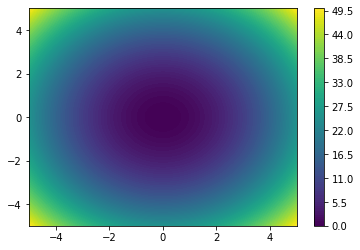

In [2]:
def sphere(params:np.ndarray, minimize=False, plotable=False) -> np.ndarray:
    """ The sphere function.
    :param params: The parameters.
    :param minimize: Whether to minimize or maximize the fitness function.
    :param plotable: Whether the parameters are plotable.
    :return: The fitness.
    """
    # check the input is right
    if not isinstance(params, np.ndarray):
        raise TypeError('The parameters must be a numpy array.')
    # calculate the fitness
    # check if params is a 1D array and reshape it if it is
    if len(params.shape) == 1:
        params = params.reshape(1, -1)
    if plotable:
        # check if param is not 2D and raise an error if it is
        if params.shape[0] != 2:
            raise ValueError('The parameters must be a 2D numpy array.')
        param1 = params[0, :]
        param2 = params[1, :]
        fitness = np.square(param1) + np.square(param2)
    else:
        fitness = np.sum(np.square(params), axis=1)
    # check if the fitness should be minimized
    return -fitness if minimize else fitness

# plot the sphere function
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = sphere(np.array([X, Y]), plotable=True)
# plot 2D contour plot
plt.contourf(X, Y, Z, 100)
plt.colorbar()
plt.show()


In [3]:
title = 'sphere'
n_agents = 10
n_dim = 2
bounds = [np.array([-2, -2]), np.array([2, 2])] # lower and upper bounds of the search space
ep_len = 20
env = OptimizationEnv(env_name=title, optFunc=sphere, n_agents=n_agents, n_dim=n_dim, bounds=bounds, ep_length=ep_len)

In [4]:
state = env.reset()
print(f"state: {state}")
print(f"state shape: {state.shape}")
print(f"state type: {type(state)}")


state: [[0.675      0.34       0.02668202]
 [0.7425     0.6625     0.14277132]
 [0.315      0.0125     0.8903434 ]
 [0.7225     0.4925     0.        ]
 [0.0425     0.7425     0.8752503 ]
 [0.075      0.8175     0.9285893 ]
 [0.0025     0.2725     1.        ]
 [0.245      0.2375     0.33788046]
 [0.335      0.68       0.04029836]
 [0.7775     0.15       0.6004956 ]]
state shape: (10, 3)
state type: <class 'numpy.ndarray'>


In [5]:
# Get Actual State
actual_state = env._get_actual_state()
print(f"actual_state: {actual_state}")

actual_state: [[ 0.69999999 -0.64        0.8996    ]
 [ 0.96999999  0.64999999  1.3634    ]
 [-0.74       -1.95        4.3501    ]
 [ 0.88999999 -0.03        0.793     ]
 [-1.83        0.96999999  4.2898    ]
 [-1.7         1.26999999  4.5029    ]
 [-1.99       -0.91        4.7882    ]
 [-1.02       -1.05        2.1429    ]
 [-0.66        0.71999999  0.954     ]
 [ 1.10999999 -1.4         3.1921    ]]


In [6]:
env.observation_space.sample()

array([[-0.95246506, -0.02120492,  1.03444076],
       [ 0.61824314,  0.65719104,  0.20286987],
       [ 1.29296777,  1.99606465,  0.5021729 ],
       [ 0.46323464,  0.99008444,  1.18478447],
       [-0.19020779,  0.57339259,  0.06510267],
       [ 1.60926201, -0.19151431,  1.01358688],
       [-0.9119032 , -0.39527478, -0.90900425],
       [ 1.48278149,  0.87134592, -1.79499301],
       [-0.83881515, -1.32659062, -1.44157081],
       [ 1.1837109 , -1.15422402,  2.24656056]])

In [7]:
env.action_space.sample()

array([[ 0.93031197,  0.45676172],
       [ 0.8186313 ,  1.80184558],
       [ 0.92427195, -0.10926228],
       [ 0.84255953, -0.73054352],
       [-0.262454  , -0.58186219],
       [-0.59596407, -0.4635182 ],
       [-1.32998566,  0.5532261 ],
       [ 0.18199144,  1.00157539],
       [ 0.05108931,  0.01089901],
       [-0.18422718, -0.49824909]])